In [48]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn import datasets

In [49]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [50]:
data = pd.DataFrame(X,columns=['f1','f2'])

In [51]:
data.head()

,f1,f2
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Text(0, 0.5, 'f2')

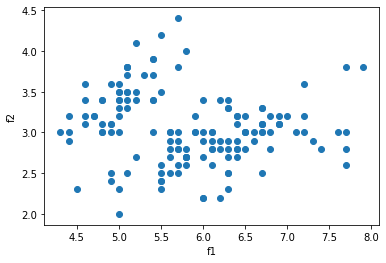

In [52]:
plt.scatter(data.f1, data['f2']) 
plt.xlabel('f1') 
plt.ylabel('f2')

In [53]:
sse = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[['f1','f2']])
    sse.append(km.inertia_)

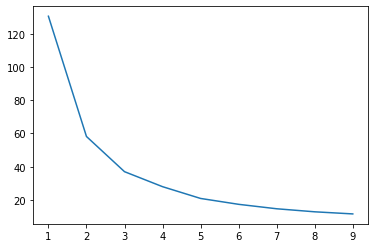

In [54]:
plt.plot(K,sse)

In [55]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['f1', 'f2']]) 
print(y_predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [56]:
scaler = MinMaxScaler()
scaler.fit(data[['f2']])
data ['f2'] = scaler.transform(data [['f2']]) 
scaler.fit(data [['f1']])
data ['f1'] = scaler.transform(data[['f1']])

In [57]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['f1', 'f2']]) 
print(y_predicted)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [58]:
data['cluster'] = y_predicted

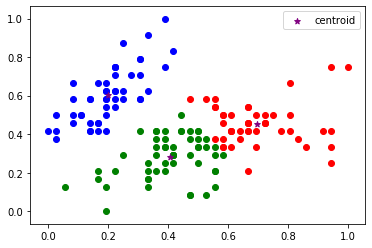

In [59]:
C1 = data[data.cluster==0]
C2 = data[data.cluster==1]
C3 = data[data.cluster==2]
plt.scatter(C1.f1,C1['f2'],color='green')
plt.scatter(C2.f1,C2['f2'],color='red')
plt.scatter(C3.f1,C3['f2'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*',label='centroid')
plt.legend()

In [60]:
sse = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[['f1','f2']])
    sse.append(km.inertia_)

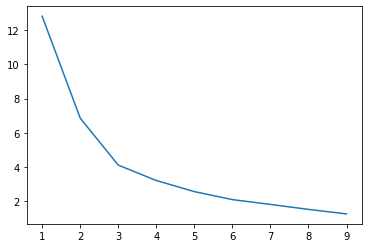

In [61]:
plt.plot(K,sse)